### Take Abalone dataset. Run some clustering method (except k-means) with different number of clusters.
### Which number of clusters is better? (use "score")

In [1]:
import pandas as pd
import numpy as np
from matplotlib import cm, pyplot as plt
%matplotlib inline
np.set_printoptions(precision=2, suppress=True)

In [2]:
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('abalone.data',header=None,names=names)

In [3]:
# change M,F and I categorical variables as numerical using 0,1 and 2.
replace_list = {"Sex" : {"M": 0, "F" : 1, "I": 2}}
df.replace(replace_list,inplace=True)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


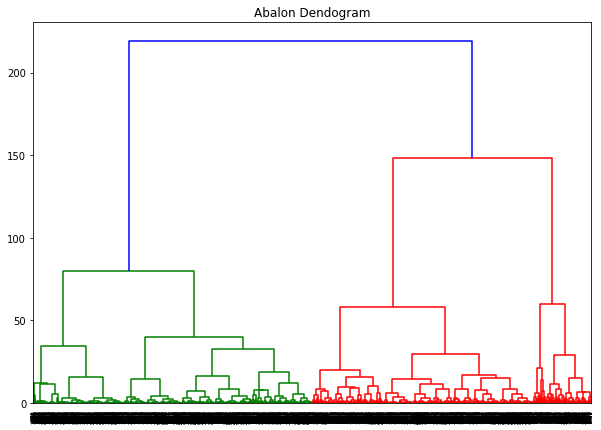

In [5]:
# let's see a dendogram first
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Abalon Dendogram")  
dend = shc.dendrogram(shc.linkage(df, method='ward')) 

In [6]:
# test with 4 clusters first
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4)  
cluster.fit(df)  

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x00000218B5787620>)

Text(0.5,1,'Abalone Agglomerative Clustering')

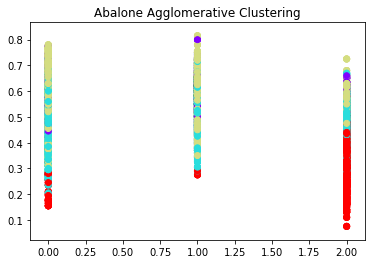

In [7]:
# let's visualize the result
for i in zip(range(4)):
    # plot the points belong to the current cluster
    plt.scatter(df.values[:,0], df.values[:,1], c=cluster.labels_, cmap='rainbow')

plt.title('Abalone Agglomerative Clustering') 

In [8]:
from sklearn import metrics

# take Rings as true clusters
labels_true = df['Rings']
score = []
clusters_settings = list(range(1, 100))
for n_clusters in clusters_settings:
# build the model
    cluster = AgglomerativeClustering(n_clusters=n_clusters)  
    labels_pred = cluster.fit_predict(df)  
# record score
    score.append(metrics.adjusted_rand_score(labels_true, labels_pred))    

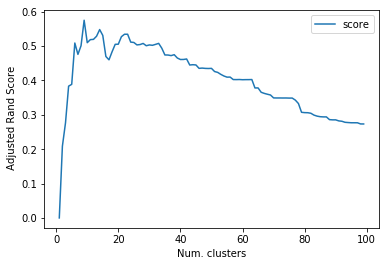

In [9]:
plt.plot(clusters_settings, score, label="score")
plt.ylabel(" Adjusted Rand Score")
plt.xlabel("Num. clusters")
plt.legend()

In [10]:
# which number of clusters has best score?
# adjust for starting from 1 cluster, not 0
hi_score = score.index(max(score)) + 1
print('Number of clusters with best performance by Adjusted Rand Score is: %s' % hi_score)
# 9 clusters gave best score

Number of clusters with best performance by Adjusted Rand Score is: 9


### Take Abalone dataset. Reduce its dimensionality to 3 with Kernel PCA, then run clustering with 10 clusters.
### What age have the cluster centroids?
Don’t forget to apply feature normalisation before clustering, and inverse feature normalisation for the cluster centres!

In [11]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

pca = KernelPCA(n_components=3, kernel="cosine", fit_inverse_transform=True)
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

#get original scale
df_scaled = pca.inverse_transform(df_pca)
df_original = scaler.inverse_transform(df_scaled)

In [12]:
# cluster with 10
cluster = AgglomerativeClustering(n_clusters=10)  
labels_pred = cluster.fit_predict(df_pca)  

In [13]:
new_df = pd.DataFrame(data=df_original, columns=df.columns, index=df.index)

In [14]:
new_df['Cluster_num'] = labels_pred

In [15]:
new_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Cluster_num
0,0.354140,0.443330,0.346068,0.123475,0.498798,0.165839,0.105808,0.177192,12.992565,9
1,0.699871,0.396384,0.302561,0.099285,0.306027,0.136360,0.067273,0.089332,7.600103,7
2,1.378697,0.397177,0.301463,0.097239,0.300789,0.144994,0.066076,0.082731,6.563412,4
3,0.221166,0.416233,0.320921,0.108689,0.392942,0.157083,0.085583,0.123268,9.445034,7
4,1.618006,0.399608,0.304183,0.100087,0.305973,0.134324,0.065978,0.093159,7.646475,4


In [16]:
# to answer question 'What age have the cluster centriods?', we assume 
# age means column Rings, and then calculate the mean of Rings in each cluster 0-9
clusters = list(range(10))
ages_of_centroids = []
for cluster in clusters:
    print("Cluster {} centroid age: {:.2f}".format(cluster, new_df[new_df['Cluster_num'] == cluster]['Rings'].mean()))
    
'''
Cluster 0 centroid age: 10.75
Cluster 1 centroid age: 8.45
Cluster 2 centroid age: 11.32
Cluster 3 centroid age: 7.68
Cluster 4 centroid age: 7.66
Cluster 5 centroid age: 14.16
Cluster 6 centroid age: 15.20
Cluster 7 centroid age: 8.53
Cluster 8 centroid age: 4.28
Cluster 9 centroid age: 13.61
'''

Cluster 0 centroid age: 10.75
Cluster 1 centroid age: 8.45
Cluster 2 centroid age: 11.32
Cluster 3 centroid age: 7.68
Cluster 4 centroid age: 7.66
Cluster 5 centroid age: 14.16
Cluster 6 centroid age: 15.20
Cluster 7 centroid age: 8.53
Cluster 8 centroid age: 4.28
Cluster 9 centroid age: 13.61


'\nCluster 0 centroid age: 10.75\nCluster 1 centroid age: 8.45\nCluster 2 centroid age: 11.32\nCluster 3 centroid age: 7.68\nCluster 4 centroid age: 7.66\nCluster 5 centroid age: 14.16\nCluster 6 centroid age: 15.20\nCluster 7 centroid age: 8.53\nCluster 8 centroid age: 4.28\nCluster 9 centroid age: 13.61\n'

### Label propagation:
-  cluster Abalone dataset without age (rings) feature using Gaussian Mixture Model
-  take randomly 20 samples with age from the original Abalone dataset, predict their probabilities with GaussianMM ("predict_proba")
-  compute class distribution for each Gaussian component
-  compute Gaussian components for each original data point
-  compute labels of original data points by multiplying their Gaussian components by class distribution of these components
-  How correct was this label propagation?

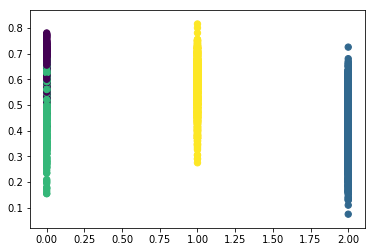

In [40]:
# -  cluster Abalone dataset without age (rings) feature using Gaussian Mixture Model

from sklearn.mixture import GaussianMixture

X = np.array(df.drop(['Rings'], 1))
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40);


In [41]:
# -  take randomly 20 samples with age from the original Abalone dataset, predict 
# their probabilities with GaussianMM ("predict_proba")
# I assume with "GaussianMM" you mean GaussianMixture, because when I try to import GaussianMM I am told it doesn't exist.

df_sample = df.sample(20)
X = np.array(df_sample)

In [42]:
gmm = GaussianMixture(n_components=9).fit(X)
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


#### I don't know what is a Gaussian component, and what does class distribution mean here. I don't understand what means compute Gaussian components for each original data point. Also I don't understand what means compute labels of original data points by multiplying their Gaussian components by class distribution of these components
Neither lecture materials nor the book contain examples of using Gaussian Mixture Model and explain the terms that should be understood to do this exercise. This exercise is too difficult and lacking teaching materials required to know how to do it.